# Unidad 01 - Test de hipótesis

En este notebook exploraremos los conceptos básicos de los test de hipótesis.

El objetivo es diseñar un experimento para confirmar o rechazar una hipótesis. Para eso vamos a usar el típico "pipeline" de estadística clásica. El proceso comienza con una hipótesis, como por ejemplo: "la vacuna A es más efectiva que la vacuna B". Luego, se diseña un experimento de manera que los resultados obtenidos sean concluyentes. Finalmente, los datos se recopilan, se analizan y se extraen conclusiones a partir de ellos. Sin embargo, para entender test de hipótesis vamos a empezar con mediciones sencillas: vamos a construir la distribución de la altura de las personas.

*Este Notebook asume que ya tenés conocimientos de Python, Jupyter, NumPy, Pandas, Seaborn y curaduría de datos*

Para buscar en internet y discutir en grupo
1.	¿Qué es una población en estadística y por qué no siempre se puede estudiar por completo?
2.	¿Qué es una muestra y cómo se selecciona de manera representativa?
3.	¿Qué rol cumple el muestreo aleatorio en la validez de los resultados?
4.	¿Qué es el sesgo de muestreo y cómo puede afectar nuestras conclusiones?


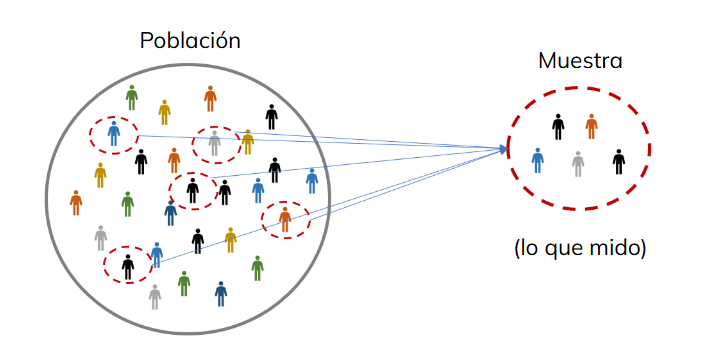

***¿Qué es una población estadística y por qué no siempre se puede estudiar por completo?***

Una población en estadística es el conjunto de todas las observaciones en las que estamos interesados. Por ejemplo, el conjunto de todas las estrellas dentro de la Vía Láctea, o el conjunto de todas las manos posibles en un juego de póquer. Llevandolo al campo de la probabilidad, la población es nuestro espacio muestral. Se llama tamaño de la población al número de individuos que la componen; así pues, las poblaciones pueden ser finitas e infinitas. Si el tamaño de una población es muy grande o infinito, es muy poco probable que seamos capaces de analizarla en su totalidad.

***¿Qué es una muestra y cómo se selecciona de manera representativa?***

Para estudiar una población existen dos posibilidades. Una de ellas consiste en estudiar todos sus elementos y sacar conclusiones; la otra consiste en estudiar sólo una parte de ellos, una muestra, elegidos de tal forma que nos digan algo sobre la totalidad de las observaciones de la población. El mejor método ser el primero, cuando es posible, lo cual sólo ocurre,como ya mencionamos,  en las poblaciones finitas y razonablemente pequeñas; en el caso de poblaciones muy grandes o infinitas será muy difícil o imposible realizar un estudio total. En este caso necesitaremos tomar una muestra y nos surgirá el problema de cómo hacer para que la muestra nos diga algo sobre el conjunto de la población.
La condición más obvia que se le puede pedir a una muestra es que sea representativa de la población.La idea sería lograr representar todas las posibles categorias dentro de mi porblación, asociadas a mi pregunta de investigación.  

***¿Qué rol cumple el muestreo aleatorio en la validez de los resultados?***

Si no conocemos la población no podemos saber si la muestra es representativa o no. La única forma de tener cierta garantía de que esto ocurra es tomar nuestra muestra de forma que cada individuo de la población y cada subgrupo posible de la población tengan igual probabilidad de ser elegidos. A este tipo de muestras se les llama muestras aleatorias o muestras al azar. Hay distintos tipos de muestreo aleatorio, según  la manera de esquematizar la selección aleatoria de individuos.  


***¿Qué es el sesgo de muestreo y cómo puede afectar nuestras conclusiones?***
El sesgo de muestreo ocurre cuando utilizamos una muestra que no es representativa de la población que buscamos estudiar. Por ejemplo, si queremos analizar las tasas de deserción escolar en adolescentes en argentina
y trabajamos con una muestra de una cierta cantidad de adolescentes de un barrio porteño particular, estamos sesgando el muestreo a una realidad, por ejemplo, socioeconomica que no necesariamente es representativa de la sociedad joven argentina total. Probablente las coonclusiones del experimento sean distintas, dependiendo el barrio que elija. O inclusive limitarse a estudiar la tasa de deserción en un año particular puede sergar el resultado. Si tomamos datos de 2020, por ejemplo, en el contexto de la pandemia, serán seguramente distintos a los del 2010, por ejemplo.


# Distribución de datos




A partir de los datos de: https://www.ncdrisc.org/data-downloads-height.html respondé a las siguientes preguntas:
1. ¿Los datos vienen de una población o de un muestreo?
2. ¿Qué información está disponible?
3. ¿De cuántos países tenemos información?
4. ¿Alturas de qué rango etareo?


In [ ]:
import pandas as pd
import seaborn.objects as so
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/NCD_RisC_Lancet_2020_height_child_adolescent_country.csv") #cargamos dataset con los promedios de las alturas de chicos y adolescentes
                                                                                    #200 paises
                                                                                    #mediciones hechas entre 1985 y 2019
                                                                                    #edades de 5 a 19

In [ ]:
df

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
0,Afghanistan,Boys,1985,5,103.315204,92.912414,113.712811,5.295555
1,Afghanistan,Boys,1985,6,109.235659,99.914439,118.282644,4.718901
2,Afghanistan,Boys,1985,7,114.759466,106.310048,123.003367,4.270250
3,Afghanistan,Boys,1985,8,120.002304,112.202520,127.549987,3.924385
4,Afghanistan,Boys,1985,9,125.077305,117.880359,132.153791,3.662401
...,...,...,...,...,...,...,...,...
209995,Zimbabwe,Girls,2019,15,156.994944,155.459365,158.533808,0.787586
209996,Zimbabwe,Girls,2019,16,158.066542,156.678653,159.485423,0.721662
209997,Zimbabwe,Girls,2019,17,158.724366,157.376912,160.097738,0.691562
209998,Zimbabwe,Girls,2019,18,159.220151,157.883096,160.558243,0.681809


In [ ]:
#el rango del 95 es el intervalo donde puede estar el promedio "real"
#que tan grande es habla de lo confiable del valor promedio

In [ ]:
print(df.Sex.unique())
print(df['Age group'].unique())
print(df.Country.unique())

['Boys' 'Girls']
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China (Hong Kong SAR)' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'DR Congo' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea Bissau' 'Guyana' 'Haiti' 'Hondu

El dataframe cuenta con 210000 observaciones. Es un muestreo de la población infanto-adolescente de 200 paises. Cada observación nos brinda información de la altura promedio, la altura promedio por debajo y superando el 95% de incerteza y la desviación estandar del promedio de la altura de una muestra según genero , grupo estario (5 a 19 años), pais y año de medición. Por cada pais de los 200 paises, tenemos una medición por año desde 1985 hasta 2019 en una muestra de hombres y en una de mujeres, por cada grupo etario.

In [ ]:
df.groupby("Country").count()

,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
Country,,,,,,,
Afghanistan,1050,1050,1050,1050,1050,1050,1050
Albania,1050,1050,1050,1050,1050,1050,1050
Algeria,1050,1050,1050,1050,1050,1050,1050
American Samoa,1050,1050,1050,1050,1050,1050,1050
Andorra,1050,1050,1050,1050,1050,1050,1050
...,...,...,...,...,...,...,...
Venezuela,1050,1050,1050,1050,1050,1050,1050
Viet Nam,1050,1050,1050,1050,1050,1050,1050
Yemen,1050,1050,1050,1050,1050,1050,1050


Para cada pais tenemos la misma cantidad de observaciones. Las muestras por genero y edad son de igual tamaño.

In [ ]:
df.groupby(["Country", "Sex", "Age group"]).count()

Year  Mean height  \
Country     Sex   Age group                      
Afghanistan Boys  5            35           35   
                  6            35           35   
                  7            35           35   
                  8            35           35   
                  9            35           35   
...                           ...          ...   
Zimbabwe    Girls 15           35           35   
                  16           35           35   
                  17           35           35   
                  18           35           35   
                  19           35           35   

                             Mean height lower 95% uncertainty interval  \
Country     Sex   Age group                                               
Afghanistan Boys  5                                                  35   
                  6                                                  35   
                  7                                                  35   
                  8                                                  35   
                  9                                                  35   
...                                                                 ...   
Zimbabwe    Girls 15                                                 35   
                  16                                                 35   
                  17                                                 35   
                  18                                                 35   
                  19                                                 35   

                             Mean height upper 95% uncertainty interval  \
Country     Sex   Age group                                               
Afghanistan Boys  5                                                  35   
                  6                                                  35   
                  7                                                  35   
                  8                                                  35   
                  9                                                  35   
...                                                                 ...   
Zimbabwe    Girls 15                                                 35   
                  16                                                 35   
                  17                                                 35   
                  18                                                 35   
                  19                                                 35   

                             Mean height standard error  
Country     Sex   Age group                              
Afghanistan Boys  5                                  35  
                  6                                  35  
                  7                                  35  
                  8                                  35  
                  9                                  35  
...                                                 ...  
Zimbabwe    Girls 15                                 35  
                  16                                 35  
                  17                                 35  
                  18                                 35  
                  19                                 35  

[6000 rows x 5 columns]

In [ ]:
df.isnull().sum()

,0
Country,0
Sex,0
Year,0
Age group,0
Mean height,0
Mean height lower 95% uncertainty interval,0
Mean height upper 95% uncertainty interval,0
Mean height standard error,0


In [ ]:
#vemos que no hay datos Nan por la cantidad de filas totales y datos validos.

La distribución de los datos es una representación gráfica de los datos recopilados de una muestra o población.
1. ¿Cómo representa un histograma la distribución?
2. ¿Qué es la altura de cada barra?


In [ ]:
#En los siguientes histogramas vemos la cantidad de individuos por cada valor de altura promedio, según sexo, de todos los paises de la muestra.

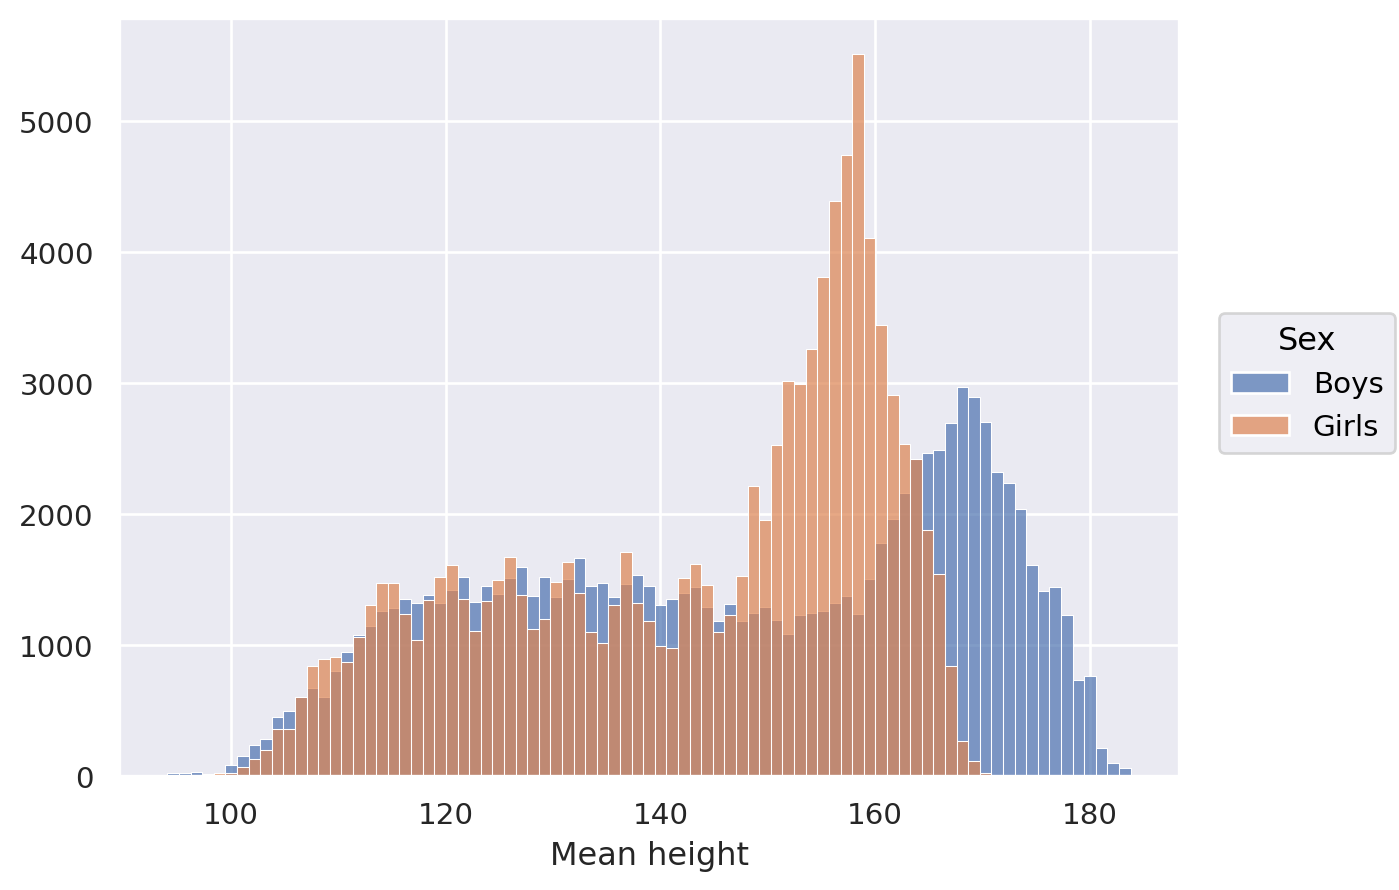

In [ ]:
so.Plot(data=df, x="Mean height", color="Sex").add(so.Bars(), so.Hist())

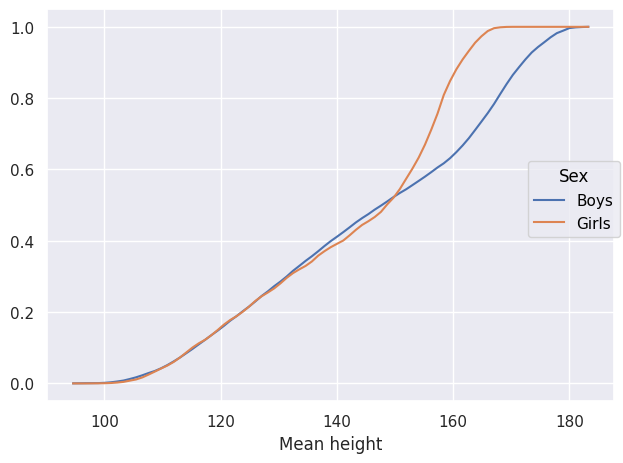

In [ ]:

so.Plot(data=df, x="Mean height", color="Sex") \
    .add(so.Lines(), so.Hist(cumulative=True, stat="probability",common_norm=False)) \
    .show()


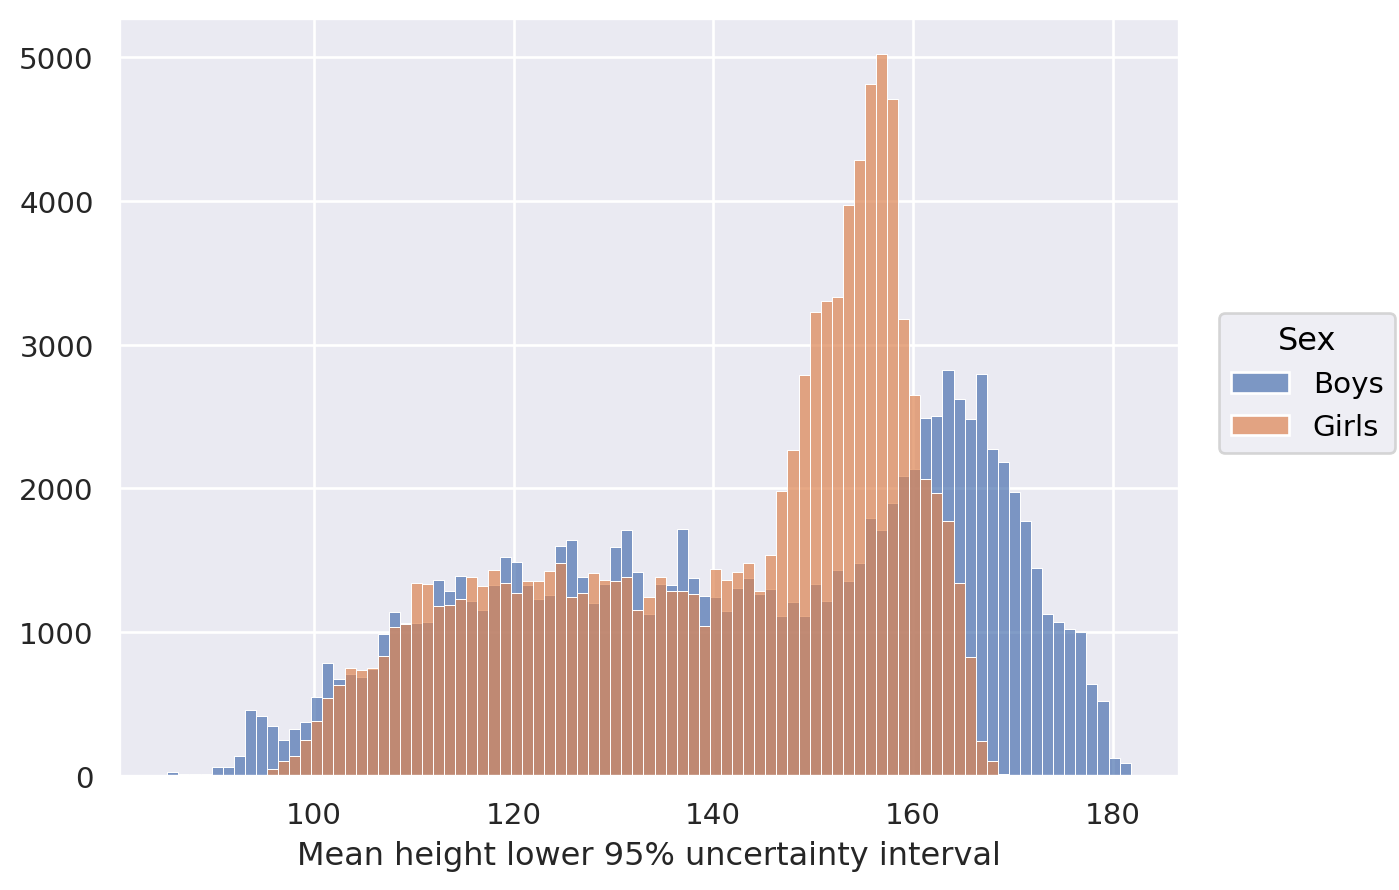

In [ ]:
so.Plot(data=df, x="Mean height lower 95% uncertainty interval", color="Sex").add(so.Bars(), so.Hist())

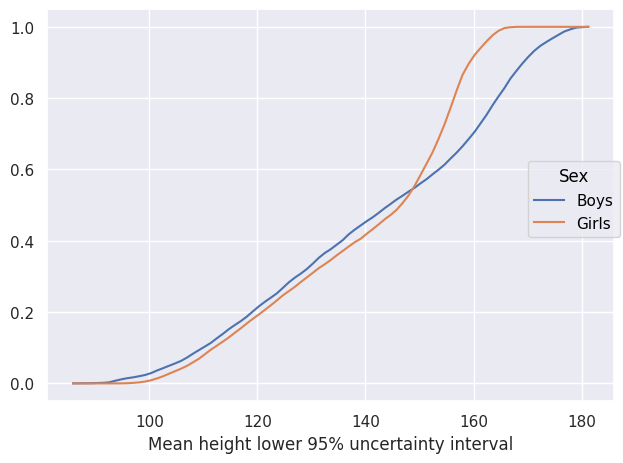

In [ ]:

so.Plot(data=df, x="Mean height lower 95% uncertainty interval", color="Sex") \
    .add(so.Lines(), so.Hist(cumulative=True, stat="probability",common_norm=False)) \
    .show()


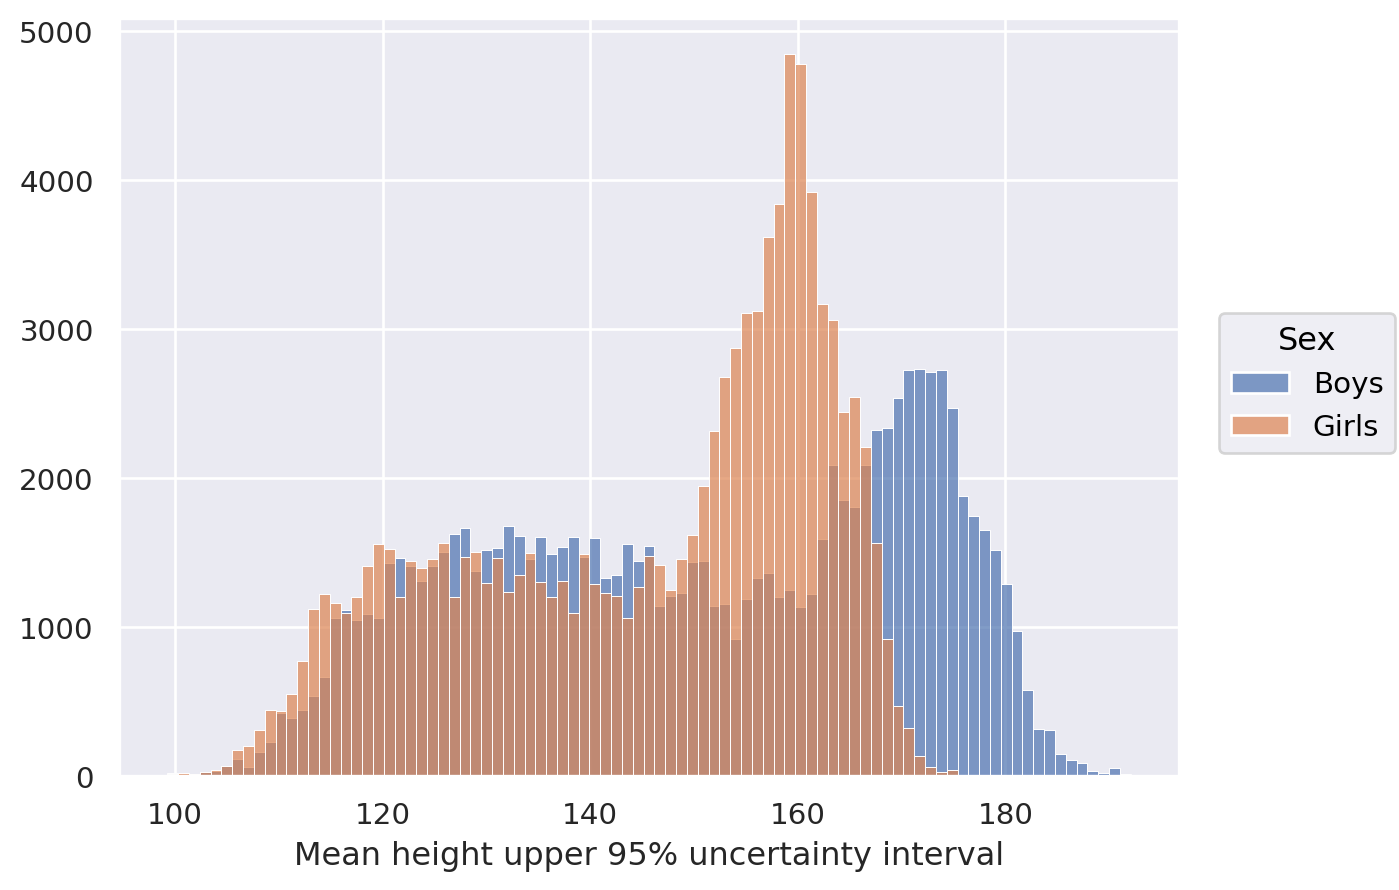

In [ ]:
so.Plot(data=df, x="Mean height upper 95% uncertainty interval", color="Sex").add(so.Bars(), so.Hist())

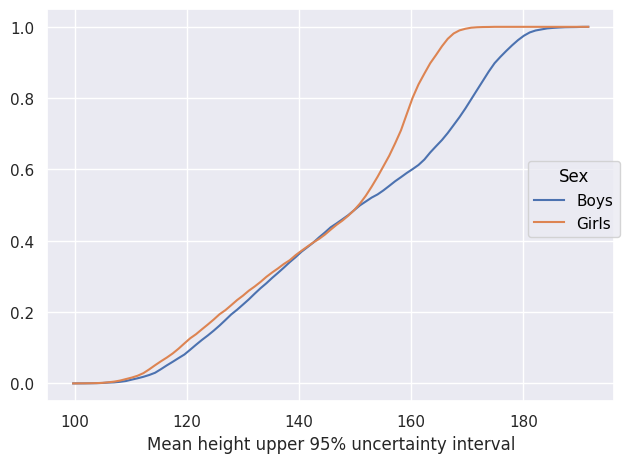

In [ ]:

so.Plot(data=df, x="Mean height upper 95% uncertainty interval", color="Sex") \
    .add(so.Lines(), so.Hist(cumulative=True, stat="probability",common_norm=False)) \
    .show() #va contando los bin values y "acumulando la suma", y el probability es para que de 1. #los dos arrancan de cero pero los divide


Graficá la distribución de alturas (ayuda: recuerden que Seaborn tiene una función para hacer histogramas https://seaborn.pydata.org/generated/seaborn.objects.Hist.html)
1. ¿Cómo cambia el histograma según la elección del parametro `stat`?
2. ¿Cómo cambia el histograma según distintos valores numéricos para el parámetro `bins`?

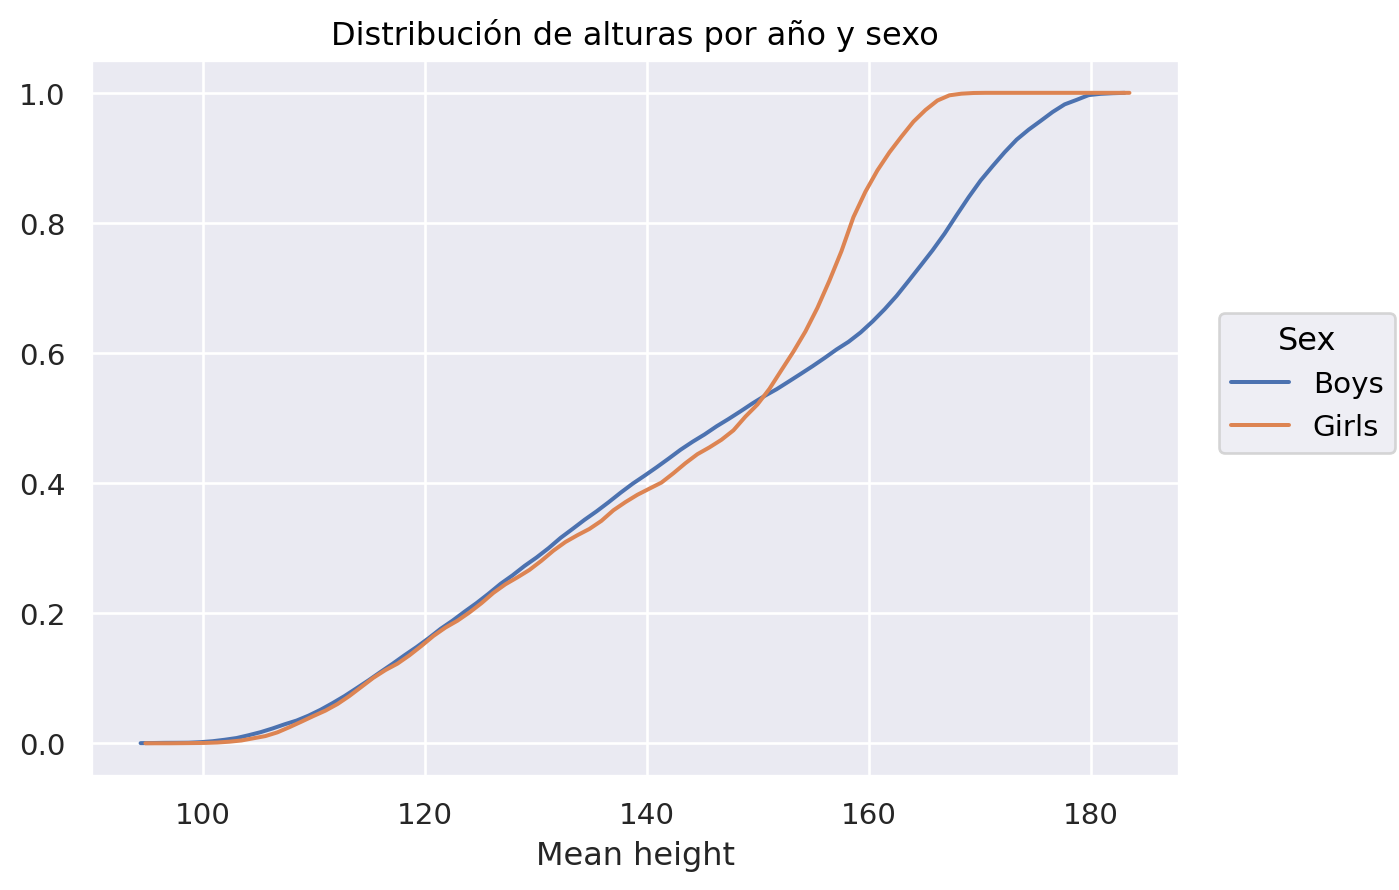

In [ ]:
(
    so.Plot(df, x="Mean height", color="Sex")
    .add(so.Line(), so.Hist("density", cumulative=True, common_norm=False), so.Dodge())
    .label(x="Mean height", title="Distribución de alturas por año y sexo")
)

#función distribucion acumulada. Esta manera de graficar no esta sujeta a la eleccion de "binneado". La elección de bins puede "modificar" la percepcion de la data.
#los problemas de binneado aumentan a menor cantidad de datos (se aleja mas de una distribucion continua.)

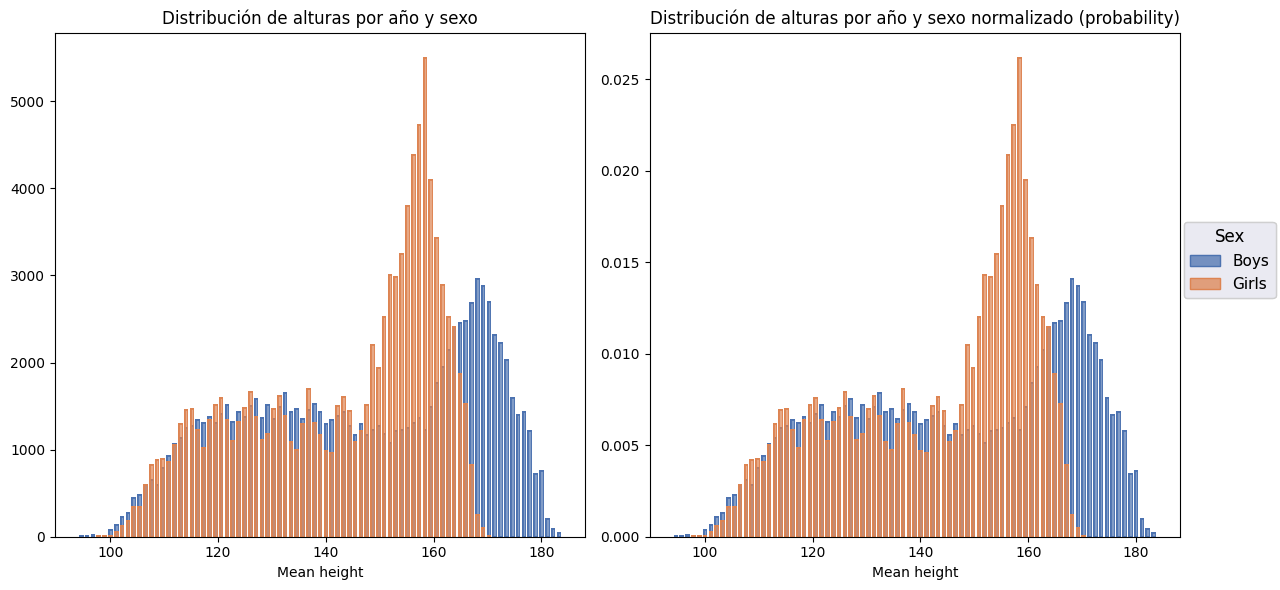

In [ ]:
#comparamos histogramas segun stats

f = plt.figure(figsize=(12, 6))
sf1 = f.add_subplot(121)
sf2 = f.add_subplot(122)



# Primer gráfico
(
    so.Plot(df, x="Mean height", color="Sex")
    .add(so.Bar(), so.Hist())
    .label(x="Mean height", title="Distribución de alturas por año y sexo")

    .on(sf1)  # Asignar al eje de la primera subfigura
    .plot()
)

# Segundo gráfico
(
    so.Plot(df, x="Mean height", color="Sex")
    .add(so.Bar(), so.Hist(stat="probability"))
    .label(x="Mean height", title="Distribución de alturas por año y sexo normalizado (probability)") #son maneras de normalizar las barras
                                                                                                      #por defecto los bins son iguales. UNo puede hacer que sean distintos
                                                                                                      #y se puede pesar su altura segun el tamaño del los bins.
                                                                                                      #hay distintas stats (aca probe una nada mas porque me dio fiaca
    .on(sf2)  # Asignar al eje de la segunda subfigura                                                #graficar todas, estan en la documentacion)
    .plot()

)
# Mostrar la figura completa
plt.tight_layout()
plt.show()

Graficá la distribución de alturas coloreada por género para personas entre 15 y 19 años.
- ¿Por qué una distribución es más alta que la otra?
- ¿Dirías que estas distribuciones son "iguales"? ¿Por qué?

In [ ]:
df_15_19=df[(df['Age group'] >= 15) & (df['Age group'] <= 19)] #nos quedamos con las observaciones de edades entre 15 y 19
df_15_19['Age group'].unique()

array([15, 16, 17, 18, 19])

In [ ]:
#graficamos la distribucion con el df filtrado y el df original

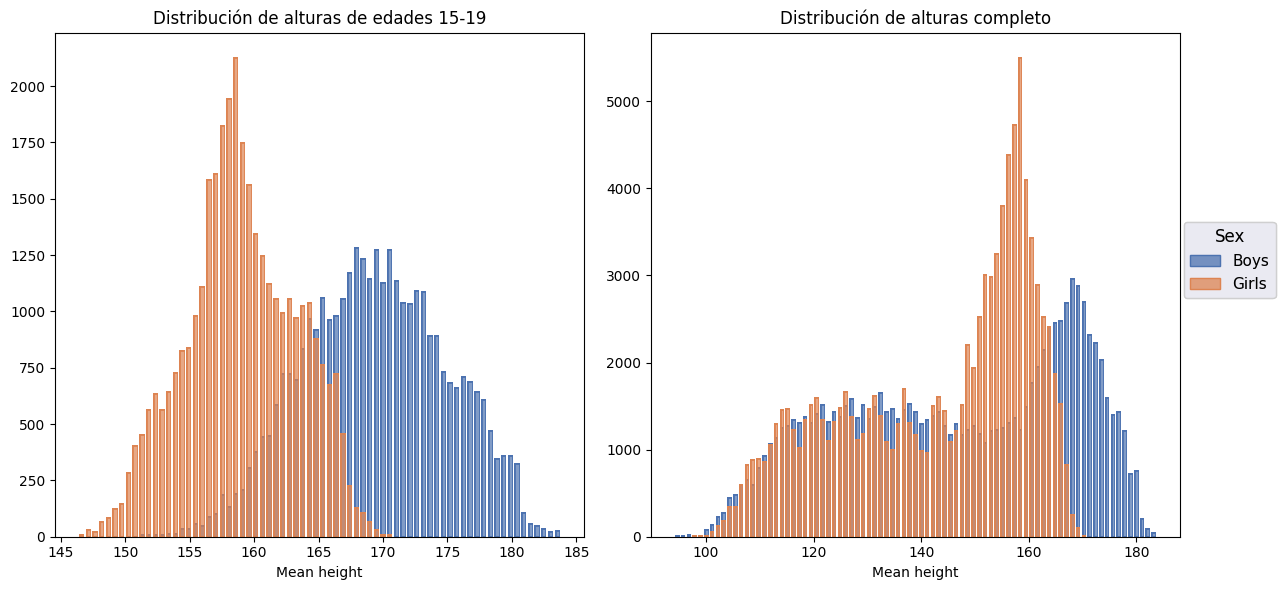

In [ ]:
f = plt.figure(figsize=(12, 6))
sf1 = f.add_subplot(121)
sf2 = f.add_subplot(122)



# Primer gráfico
(
    so.Plot(df_15_19, x="Mean height", color="Sex")
    .add(so.Bar(), so.Hist())
    .label(x="Mean height", title="Distribución de alturas de edades 15-19")

    .on(sf1)  # Asignar al eje de la primera subfigura
    .plot()
)

# Segundo gráfico
(
    so.Plot(df, x="Mean height", color="Sex")
    .add(so.Bar(), so.Hist())
    .label(x="Mean height", title="Distribución de alturas completo")



    .on(sf2)  # Asignar al eje de la segunda subfigura
    .plot()

)
# Mostrar la figura completa
plt.tight_layout()
plt.show()


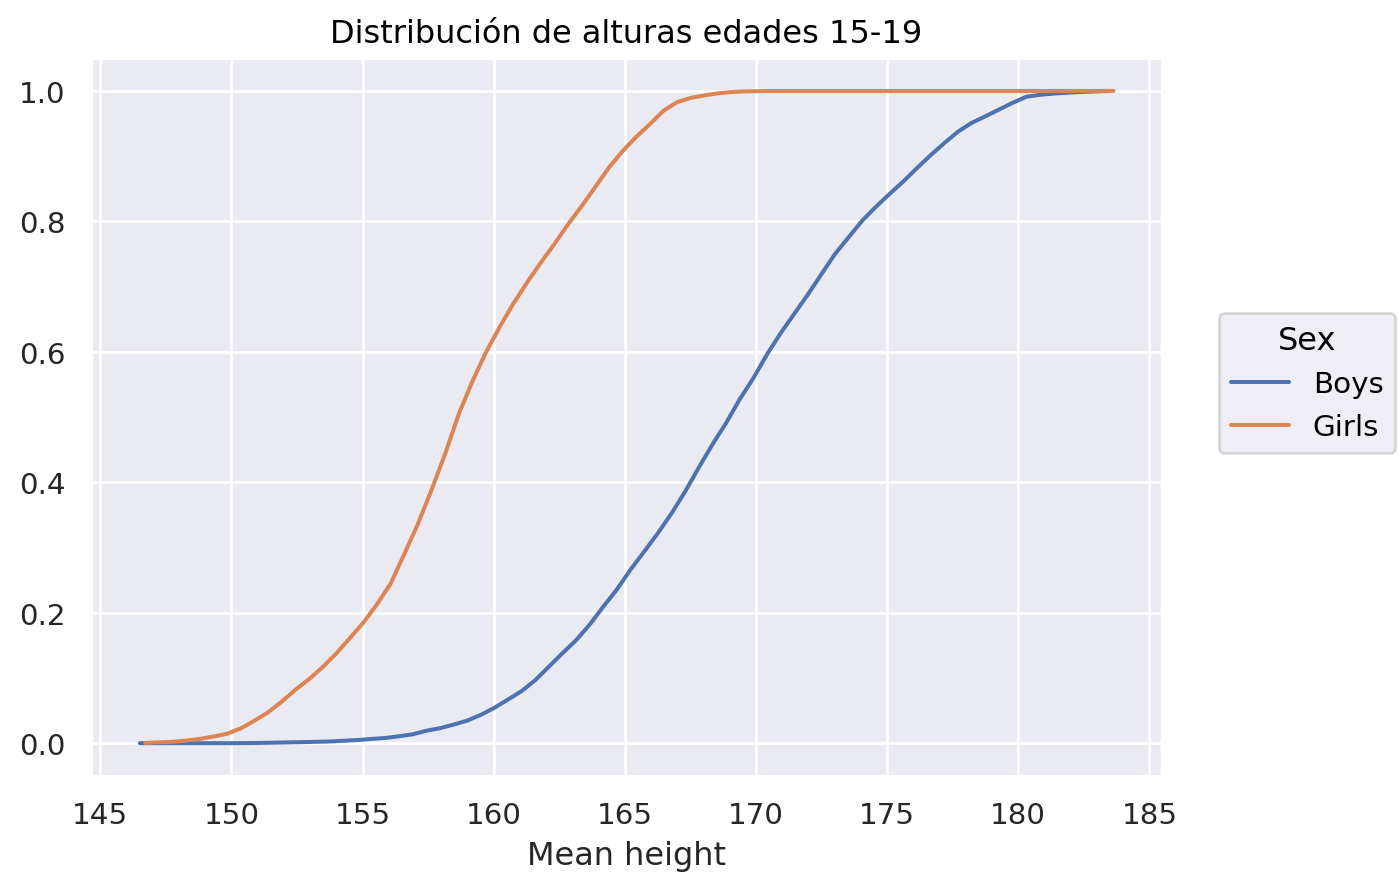

In [ ]:
#distribucion acumulada del filtrado y el completo

(
     so.Plot(df_15_19, x="Mean height", color="Sex")
    .add(so.Line(), so.Hist("density", cumulative=True, common_norm=False), so.Dodge())
    .label(x="Mean height", title="Distribución de alturas edades 15-19")
)




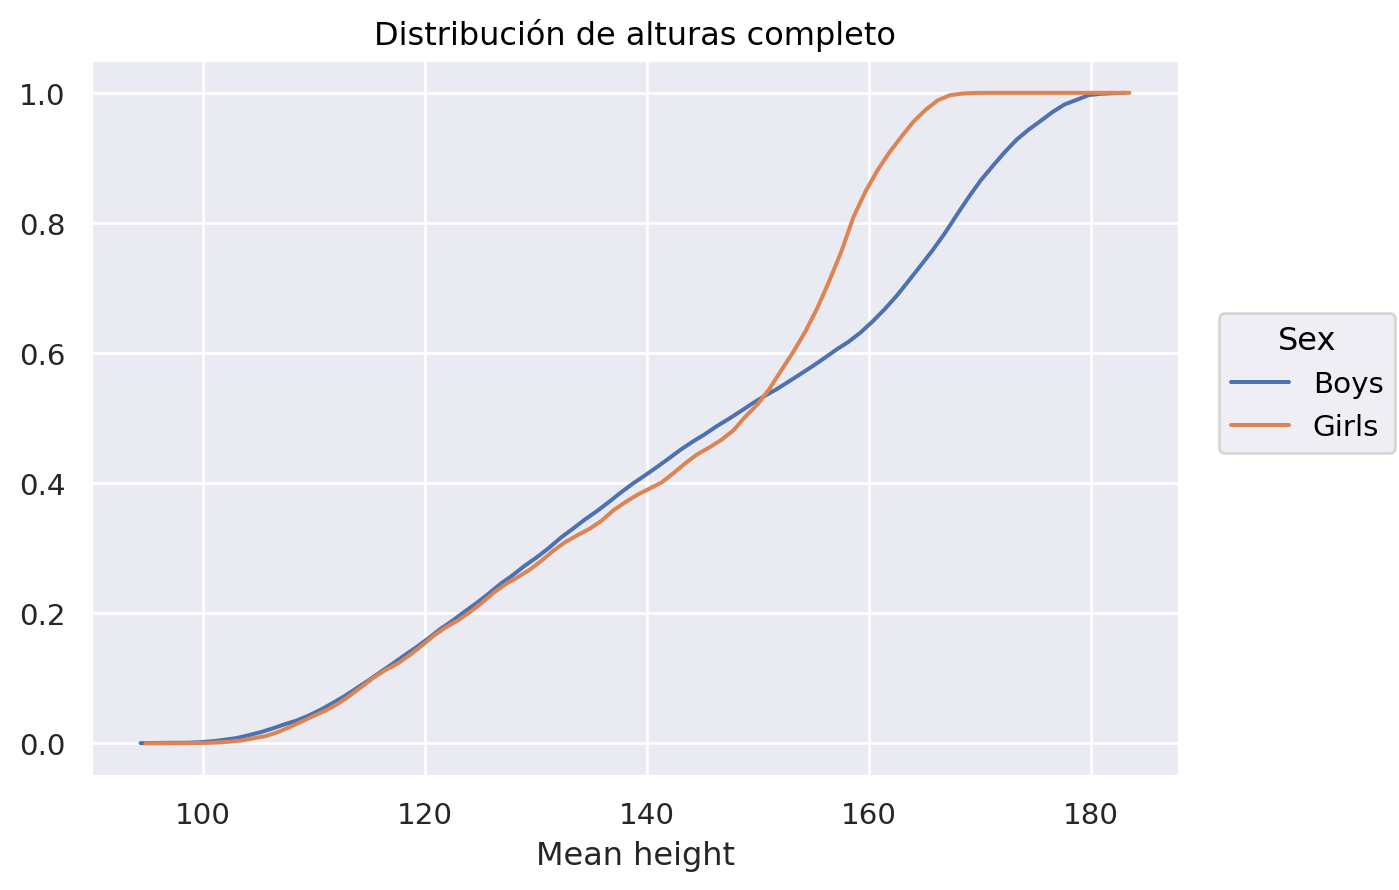

In [ ]:

(
    so.Plot(df, x="Mean height", color="Sex")
    .add(so.Line(), so.Hist("density", cumulative=True, common_norm=False), so.Dodge())
    .label(x="Mean height", title="Distribución de alturas completo")


)

In [ ]:
#¿son la misma distribucion?

# Estimadores estadísticos

Ya vimos que la media y la desviación estándar son indicadores de interés al describir distribuciones.
- ¿Cuánto valen estos indicadores por género para la 'Mean height'? (Si tu primero impulso no fue usar un groupby y agg, seguí tu impulso y luego compará con groupby y agg)
- ¿Qué significa la media y desviación de 'Mean height'? ¿la media de que media es?

**Para pensar:**
- ¿Qué es un outlier?
- ¿Cómo se determina qué valor es un outlier y qué no?
- ¿Hay algun outlier en los datos?

In [ ]:
niños = df[df["Sex"] == "Boys"]["Mean height"]
nenas = df[df["Sex"] =="Girls"]["Mean height"]
std_niños=niños.std()
std_nenas=nenas.std()
mean_niños=niños.mean()
mean_nenas=nenas.mean()
print(std_niños, std_nenas, mean_niños, mean_nenas)
df.groupby("Sex")["Mean height"].agg(["std", "mean"])

21.43655000688191 17.489103624162567 146.41875782676667 142.98341722212095


,std,mean
Sex,,
Boys,21.436550,146.418758
Girls,17.489104,142.983417


In [ ]:
#podemos ver si hay valores que se alejen mucho de la medio, en terminos de la desviacion estandar
df[(df["Sex"] == "Boys") & ((df["Mean height"] < mean_niños - 2 * std_niños) | (df["Mean height"] > mean_niños + 2 * std_niños))] #si tomamos tres desviaciones estandar, no hay outsiders
#lo cual tiene sentido si asumimos dist normal

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
0,Afghanistan,Boys,1985,5,103.315204,92.912414,113.712811,5.295555
15,Afghanistan,Boys,1986,5,103.395276,93.069305,113.780178,5.294008
30,Afghanistan,Boys,1987,5,103.473383,93.184298,113.905708,5.294480
7350,Bangladesh,Boys,1985,5,100.622054,93.651016,107.124100,3.442956
7365,Bangladesh,Boys,1986,5,100.620863,93.638182,107.181291,3.453319
...,...,...,...,...,...,...,...,...
104925,Zimbabwe,Boys,2015,5,101.780920,92.799578,111.338431,4.737947
104940,Zimbabwe,Boys,2016,5,101.728413,92.597478,111.528906,4.837337
104955,Zimbabwe,Boys,2017,5,101.677425,92.402306,111.755909,4.949294
104970,Zimbabwe,Boys,2018,5,101.627816,92.018550,111.869436,5.072513


In [ ]:
df[(df["Sex"] == "Girls") & ((df["Mean height"] < mean_nenas - 2 * std_nenas) | (df["Mean height"] > mean_nenas + 2 * std_nenas))]

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
105000,Afghanistan,Girls,1985,5,100.988983,96.146747,105.823705,2.475346
105001,Afghanistan,Girls,1985,6,106.578546,102.478251,110.578383,2.063438
105015,Afghanistan,Girls,1986,5,101.030295,96.214682,105.803225,2.462753
105016,Afghanistan,Girls,1986,6,106.620601,102.567520,110.559335,2.045824
105030,Afghanistan,Girls,1987,5,101.070908,96.278297,105.818232,2.451215
...,...,...,...,...,...,...,...,...
209925,Zimbabwe,Girls,2015,5,107.824577,102.505781,113.243503,2.698228
209940,Zimbabwe,Girls,2016,5,107.779214,102.332530,113.286964,2.743217
209955,Zimbabwe,Girls,2017,5,107.732923,102.190521,113.303592,2.793932
209970,Zimbabwe,Girls,2018,5,107.687295,102.054797,113.365030,2.850587


### Percentil

1. ¿Qué significa el percentil 90?
2. ¿Cómo interpretarías el hecho de que una persona que mide 1.90 m esté en el percentil 95 de altura dentro de una población?
3. ¿Significa esto que no existen personas más altas que ella?


In [ ]:
percentil_90_varones = np.percentile(df[df["Sex"] == "Boys"]["Mean height"], 90)
#el 90% de los datos esta debajo de este valor
percentil_90_mujeres= np.percentile(df[df["Sex"] == "Girls"]["Mean height"], 90)
print(f"El percentil 90 de las alturas de varones es: {percentil_90_varones}")
print(f"El percentil 90 de las alturas de mujeres es: {percentil_90_mujeres}")

El percentil 90 de las alturas de varones es: 172.53261958000002
El percentil 90 de las alturas de mujeres es: 161.82746464000002


In [ ]:
#el percentil 95 te dice, debajo de este valor esta el 95% de los datos. Si una persona de 1.90 esta en el percentil,
#eso solo quiere decir que el percentil es >= a 1.90.

¿Cómo podemos unir la idea de percentiles y desviación estandar?



In [ ]:
#yo creo que podes usar los pecentiles para definir que es un outlider y que no

In [ ]:
#rta

Si asumimos que los datos siguen una distribución normal, podemos usar la Regla Empírica (68-95-99.7), que establece que:

±1 desviación estándar abarca aproximadamente el 68% de los datos → Esto corresponde al percentil 16 a percentil 84.

±2 desviaciones estándar abarcan aproximadamente el 95% de los datos → Esto corresponde al percentil 2.5 a percentil 97.5.

±3 desviaciones estándar abarcan aproximadamente el 99.7% de los datos → Esto corresponde al percentil 0.15 a percentil 99.85.





Esto significa que si defines outliers como valores fuera de 2 desviaciones estándar, estarías identificando aquellos que están en el 2.5% más bajo y el 2.5% más alto de los datos—prácticamente el mismo criterio que usar los percentiles 2.5 y 97.5.

🔹 Entonces, ¿cuál usar?
Si la distribución es normal, los percentiles y la desviación estándar son equivalentes.

Si la distribución es sesgada o irregular, los percentiles pueden ser más confiables porque no dependen de la simetría de los datos.

Si tienes valores extremos, los percentiles pueden capturar mejor las anomalías sin verse afectados por datos atípicos como la desviación estándar.

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------#

Graficar sobre las distribuciones la media, el pecentil 16 y 84 y la desviación estándar. (*Sugerencia*: Después de llamar a `so.Plot` podes usar la función `axhline`  y `axvline` para graficar lineas horizontales o verticales)

```python
import seaborn.objects as so
import matplotlib.pyplot as plt

(
  so.Plot # ... todo el codigo que necesites
)
plt.axhline(0.5)
```

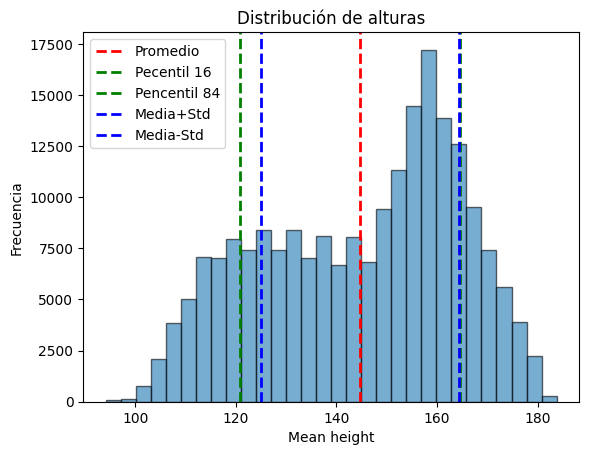

In [ ]:
#lo hago con matplot

plt.hist(df["Mean height"], bins=30,alpha=0.6, edgecolor="black")
plt.axvline(df["Mean height"].mean(), color="red", linestyle="dashed", linewidth=2, label="Promedio")
plt.axvline(df["Mean height"].quantile(0.16), color="green", linestyle="dashed", linewidth=2, label="Pecentil 16")
plt.axvline(df["Mean height"].quantile(0.84), color="green", linestyle="dashed", linewidth=2, label="Pencentil 84")
plt.axvline(df["Mean height"].mean()+df["Mean height"].std(), color="blue", linestyle="dashed", linewidth=2, label="Media+Std")
plt.axvline(df["Mean height"].mean()-df["Mean height"].std(), color="blue", linestyle="dashed", linewidth=2, label="Media-Std")


# Configurar leyendas y etiquetas
plt.xlabel("Mean height")
plt.ylabel("Frecuencia")
plt.title("Distribución de alturas")
plt.legend()




**Para pensar en grupo**

1. ¿Podríamos sugerir que estas dos distribuciones son normales?
1. Simular una gaussiana con la misma media y std y compararlas.


In [ ]:
chicas=df[df["Sex"]=="Girls"]["Mean height"]
chicos=df[df["Sex"]=="Boys"]["Mean height"]




In [ ]:
#revisar como comparar distribuciones

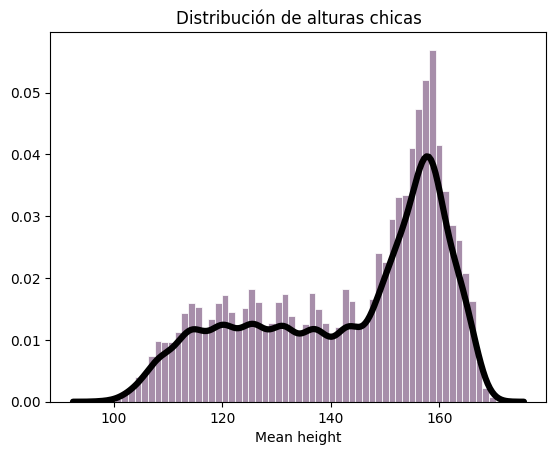

In [ ]:
chicas=pd.DataFrame(chicas)
chicos=pd.DataFrame(chicos)
f,ax=plt.subplots()
p_m=(so.Plot(chicas, x="Mean height")
.add(so.Bars(color="#825f87"), so.Hist(stat="probability"))
.add(so.Line(linewidth=4.5, color="black"), so.KDE())
.label(x="Mean height", title="Distribución de alturas chicas")

)


p_m.on(ax).show()




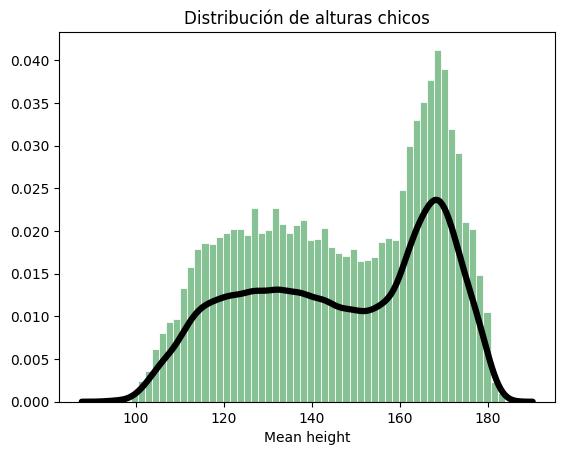

In [ ]:
f,ax=plt.subplots()
p_h=(so.Plot(chicos, x="Mean height")
.add(so.Bars(color="g"), so.Hist(stat="probability"))
.add(so.Line(linewidth=4.5, color="black"), so.KDE())
.label(x="Mean height", title="Distribución de alturas chicos")

)


p_h.on(ax).show()

In [ ]:
#observamos que no parecieran distribuciones normales. Si hay tramos donde parecieran segir una distribucion normal.
#graficamos normales sobre las distribuciones

In [1]:
rng=rng = np.random.default_rng()
chicas_normal=rng.normal(loc=chicas.mean(), scale=chicas.std(), size=10000)
chicos_normal=rng.normal(loc=chicos.mean(), scale=chicos.std(), size=1000)


NameError: name 'np' is not defined

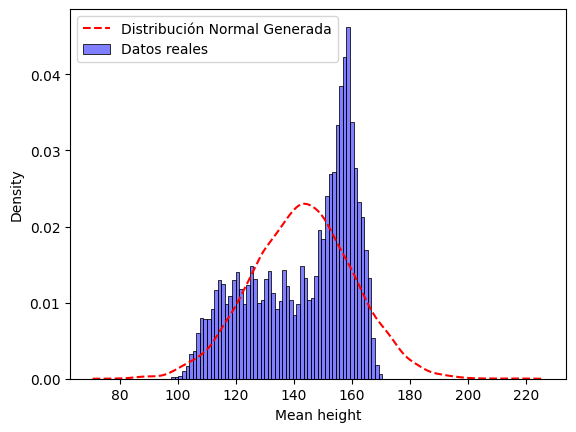

In [ ]:
#grafico chicas
#con so.Plot me parecio mas dificil de hacer
sns.histplot(chicas["Mean height"], stat="density", label="Datos reales", color="blue", alpha=0.5)

sns.kdeplot(chicas_normal, label="Distribución Normal Generada", color="red", linestyle="dashed")

plt.legend()
plt.show()



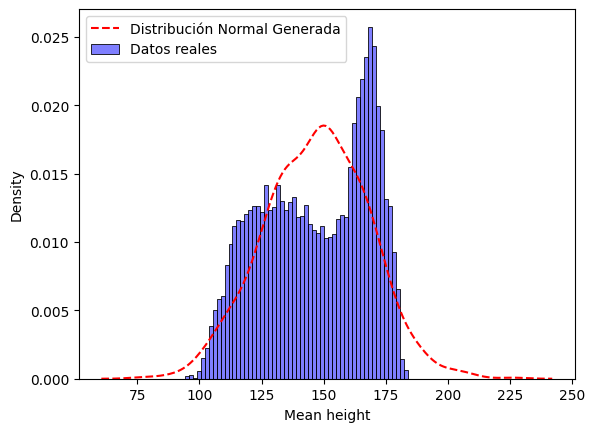

In [ ]:
#grafico hombres

sns.histplot(chicos["Mean height"], stat="density", label="Datos reales", color="blue", alpha=0.5)

sns.kdeplot(chicos_normal, label="Distribución Normal Generada", color="red", linestyle="dashed")

plt.legend()
plt.show()

In [ ]:
#hagamos un qqplot para terminar de confirmar la teoria de q no es normal
#preguntar

# Test de Hipótesis

Supongamos que queremos determinar cuál de dos vacunas es más efectiva. Para ello, podríamos diseñar un experimento con dos grupos: uno que recibe el nuevo tratamiento y otro que recibe el tratamiento estándar o no recibe ninguno, conocido como grupo control.

1. ¿Cuál es el propósito de los test de hipótesis en el análisis estadístico?
2. ¿Qué es y por qué necesitamos el **grupo control**?
3. ¿Por qué es importante asignar aleatoriamente a los sujetos en un experimento estadístico?
4. ¿Por qué no simplemente analizar los resultados del experimento y elegir el tratamiento que mejor funcione?

In [ ]:
#1 poner a prueba la hipotesis
#2 poder comparar
#3 para evitar sesgos
#4 el test de hipotesis sirve para rechazar una, pero nunca la comprueba. Luego solo con esto no la damos como valida.
#para "probar algo" uno elige una hipotesis a refutar, y reefutar eso implica lo q queres probar.

## Hipótesis Nula

Dado que tendemos a ver patrones en eventos aleatorios, en los experimentos se necesita evidencia de que una diferencia entre grupos es más extrema de lo que el azar podría explicar. Para eso, partimos de la suposición de que los tratamientos no tienen efectos distintos y que cualquier diferencia observada es producto del azar. Esta suposición inicial se conoce como **hipótesis nula**. El objetivo del análisis es refutar esta hipótesis, demostrando que los resultados de los grupos A y B son más diferentes de lo que cabría esperar bajo el efecto del azar. En otras palabras, la hipótesis nula suele ser lo opuesto a lo que el investigador o la investigadora busca demostrar. Por ejemplo, si se desea probar que un nuevo medicamento es más efectivo que uno antiguo, la hipótesis nula establece que no existen diferencias significativas entre ambos.

Una manera de evaluar esto es mediante un procedimiento de permutación o randomización: los resultados de los grupos A y B se combinan y se redistribuyen aleatoriamente (en grupos del mismo tamaño original). Se repite este proceso muchas veces para construir una distribución de referencia, llamado **modelo nulo**, que representa la hipótesis de que los grupos son equivalentes e intercambiables y evalúa si los resultados observados pueden explicarse razonablemente bajo ese modelo. En el ejemplo que estamos usando significa que no podemos distinguir entre los tratamientos.

Las pruebas de hipótesis no solo involucran una hipótesis nula, sino también una **hipótesis alternativa**, que representa el efecto que esperamos detectar. Algunos ejemplos:

*   Hipótesis nula: “No hay diferencia entre los promedios de los grupos A y B”

Hipótesis alternativa: “Los promedios de A y B son diferentes”.

*   Hipótesis nula: “A ≤ B”

Hipótesis alternativa: “A > B"

*   Hipótesis nula: “B no es al menos X% mayor que A”

Hipótesis alternativa: “B es al menos X% mayor que A”

## p-valor

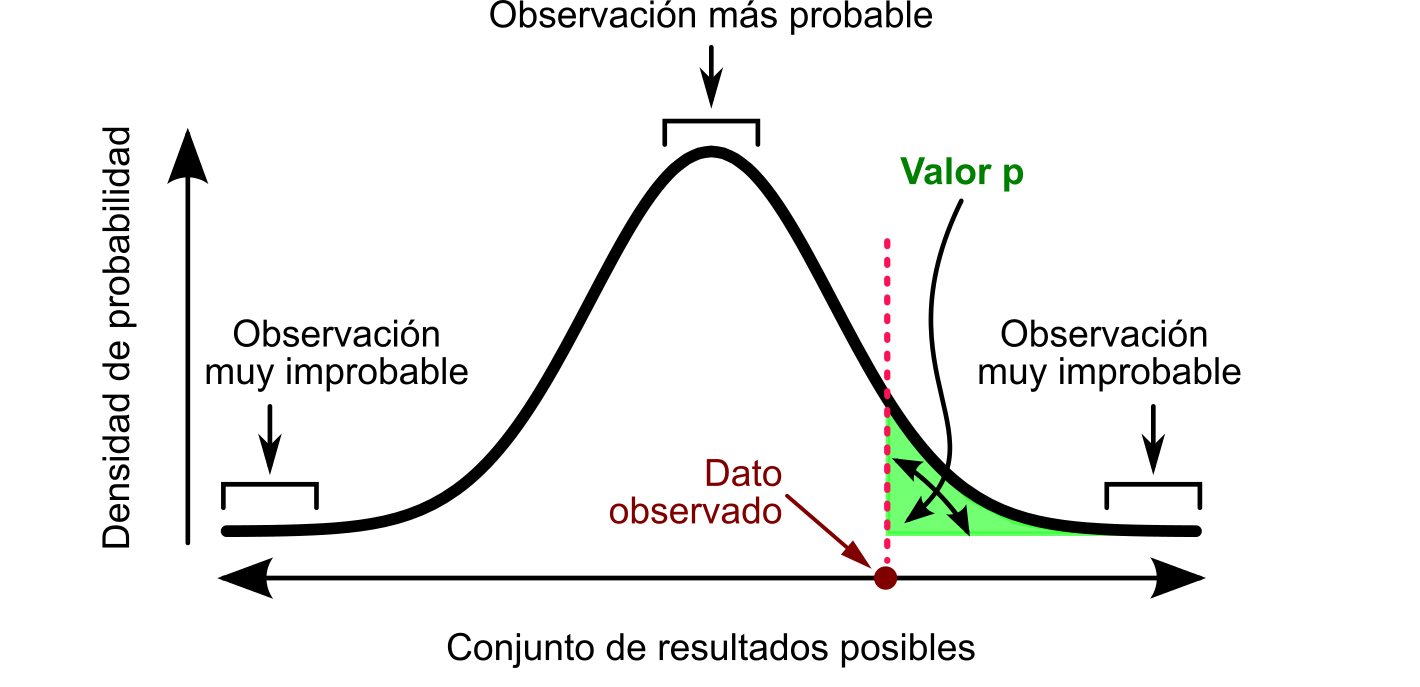

**Para responder**: ¿Cuál es la definición de p-valor?

In [ ]:
#medias algo, el p valor seria la proba de observar eso o algun valos mas extremo dado que la hip nula es cierta.

In [ ]:
#si la proba de observar eso que observaste daa la hipotesis nula es baja, luego es probable que rechaces la hip
#pero es solo eso, no hay que darle mas importancia que esa.

Uno de los principales problemas con el p-valor es que puede encontrarse una  hipótesis que produzcan una diferencia significativa. Este fenómeno es conocido como $p-hacking$.

Uno de los problemas de fondo es que se suele interpretar el p-valor de manera errónea. Por ejemplo:
*La probabilidad de que el resultado se deba al azar* es una interpretación, un p-valor bajo se asume como una demostración concluyente de un efecto real. Sin embargo, lo que el p-valor realmente representa es:

*la probabilidad de obtener un resultado tan extremo como el observado, asumiendo que el modelo nulo es cierto*

Aunque la diferencia es sutil, es fundamental: un p-valor significativo no proporciona una prueba definitiva de un efecto real, sino solo evidencia contra la hipótesis nula dentro del modelo estadístico utilizado.

Ver: https://amstat.tandfonline.com/doi/full/10.1080/00031305.2016.1154108

**Para pensar en grupo**:
1. ¿Cuál es la probabilidad de que una persona tenga una altura de 183 cm y sea hombre? ¿Cuál es la hipótesis nula aca?
2. Cuál sería la probabilidad de que sea mujer?
3. ¿Qué sucede si consideramos ahora una persona con una altura de 1.70 m?
4. Puede ocurrir que el p-valor de cero? Cómo lo solucionarías?

Calcular el p-valor para cada caso.

In [ ]:
#hip nula= las distribuciones de alturas son iguales para ambos generos
#quiero p(mida 183|es hombre)
#aca puedo usar la idea que es una distribucion gaussiana (lo q vimos arriba ) y calcular de ahi. Y aumir que la porba de que sea hombre es 1/2
#para q sea mujer es un poco lo mismo pero aca me piden la proba condicionada directamente.
#probablemente aca no refute la hip nula
#que el p valor sea cero implica que no hay posibilidad de medir lo que medi, probablente mediria denuveo asumo.


In [ ]:
#calculamos el p valor usando la aprox de posibles/totales porqu no conozco la distribucion
#no se si este es el p valor, creo q no


In [ ]:
hombres_183_o_mas=chicos[chicos['Mean height']>=183].count()
mujeres_183_o_mas=chicas[chicas['Mean height']>=183].count()
hombres_170_o_mas=chicos[chicos['Mean height']>=170].count()
mujeres_170_o_mas=chicas[chicas['Mean height']>=170].count()
total_mujeres=chicas.count()
total_hombres=chicos.count()

p_value_hombres_183 = hombres_183_o_mas / total_hombres
p_value_mujeres_183 = mujeres_183_o_mas / total_mujeres
p_value_hombres_170 = hombres_170_o_mas / total_hombres
p_value_mujeres_170 = mujeres_170_o_mas / total_mujeres

print(f"La probabilidad de que un hombre mida 1.83m o más= {p_value_hombres_183}")
print(f"La probabilidad de que una mujer mida 1.83m o más= {p_value_mujeres_183}")
print(f"La probabilidad de que un hombre mida 1.70m o más= {p_value_hombres_170}")
print(f"La probabilidad de que una mujer mida 1.70m o más= {p_value_mujeres_170}")


La probabilidad de que un hombre mida 1.83m o más= Mean height    0.000467
dtype: float64
La probabilidad de que una mujer mida 1.83m o más= Mean height    0.0
dtype: float64
La probabilidad de que un hombre mida 1.70m o más= Mean height    0.154276
dtype: float64
La probabilidad de que una mujer mida 1.70m o más= Mean height    0.000181
dtype: float64


In [ ]:
"""#lo que hago es lo siguiente. Para saber la p de medir 1.83 siendo hombre
#deberia integran la distribucion entre 1.83 e inf
#en lugar de hacer eso, lo hago por el complemento
#sea X= altura media hombres
#luego P(X>=183)=1-P(X<=183)(el igual no afecta porque es una distribucion continua)
#para calcular p(X<=183), defino z=(183-mu)/std
#cambio de var para pasar a una distribucion normal (o,1)
#luego, puedo calcular la funcion de distribucion acumulada facil
#en realidad no lo defino yo, eso lo hace stats pero entiendo que es esa la idea.
import scipy.stats as stats

#defino los parametros de la dist
mu_hombres = df[df["Sex"]=="Boys"]["Mean height"].mean()
sigma_hombres= df[df["Sex"]=="Boys"]["Mean height"].std()

x = 183

# Calculo la probabilidad P(X >= 183)
p_value_hombres_183 = 1 - stats.norm.cdf(x, mu_hombres, sigma_hombres)

#lo mismo para mujeres
mu_mujeres = df[df["Sex"]=="Girls"]["Mean height"].mean()
sigma_mujeres= df[df["Sex"]=="Girls"]["Mean height"].std()

p_value_mujeres_183 = 1 - stats.norm.cdf(x, mu_mujeres, sigma_mujeres)

#ahora con 1.70m

y=170
p_value_hombres_170=1-stats.norm.cdf(y,mu_hombres,sigma_hombres)
p_value_mujeres_170=1-stats.norm.cdf(y,mu_mujeres,sigma_mujeres)

print(f"La probabilidad de que un hombre mida 1.83m = {p_value_hombres_183:.6f}")
print(f"La probabilidad de que una mujer mida 1.83m = {p_value_mujeres_183:.6f}")
print(f"La probabilidad de que un hombre mida 1.70m = {p_value_hombres_170:.6f}")
print(f"La probabilidad de que una mujer mida 1.70m = {p_value_mujeres_170:.6f}")
#no se si esto esta bien, porque no se en que momeno asumo la hip nula"""
#esti no anda porque justamente la distribucion no es gaussiana

'#lo que hago es lo siguiente. Para saber la p de medir 1.83 siendo hombre\n#deberia integran la distribucion entre 1.83 e inf\n#en lugar de hacer eso, lo hago por el complemento\n#sea X= altura media hombres\n#luego P(X>=183)=1-P(X<=183)(el igual no afecta porque es una distribucion continua)\n#para calcular p(X<=183), defino z=(183-mu)/std\n#cambio de var para pasar a una distribucion normal (o,1)\n#luego, puedo calcular la funcion de distribucion acumulada facil\n#en realidad no lo defino yo, eso lo hace stats pero entiendo que es esa la idea.\nimport scipy.stats as stats\n\n#defino los parametros de la dist\nmu_hombres = df[df["Sex"]=="Boys"]["Mean height"].mean()\nsigma_hombres= df[df["Sex"]=="Boys"]["Mean height"].std()\n\nx = 183\n\n# Calculo la probabilidad P(X >= 183)\np_value_hombres_183 = 1 - stats.norm.cdf(x, mu_hombres, sigma_hombres)\n\n#lo mismo para mujeres\nmu_mujeres = df[df["Sex"]=="Girls"]["Mean height"].mean()\nsigma_mujeres= df[df["Sex"]=="Girls"]["Mean height"].s

### Test de Kolmogorov – Smirnov

Existen muchos tests estadísticos, y su elección depende del tipo de datos, la cantidad de observaciones, el número de grupos y la variable que se está analizando. Por ejemplo, podríamos preguntarnos si nuestras muestras provienen de una distribución normal.

El test de Kolmogorov-Smirnov (K-S) es un test no paramétrico que puede utilizarse para evaluar si una muestra proviene de una distribución de referencia específica (test K-S de una muestra) o si dos muestras provienen de la misma distribución (test K-S de dos muestras). A diferencia de los tests paramétricos, el test K-S no asume que los datos sigan una distribución normal, lo que lo hace útil en distintos contextos.

Para las comparaciones estadísticas vamos a usar scipy, particularmente el módulo $stats$.

Documentación: https://docs.scipy.org/doc/scipy/reference/stats.html

Código fuente: https://github.com/scipy/scipy

**Buscá en la documentación qué parámetros tiene este test y buscá para qué sirven**

En nuestro caso, queremos comprobar si nuestras distribuciones son normales. Como la hipótesis nula representa el escenario de "no efecto" o de "ausencia de diferencia" nuestra hipotesis nula es: **los datos provienen de una distribución normal**. Usá el test de KS para calcular el p-valor y ver si las distribuciones vienen de una distribución normal:

El nivel típico de confianza que se utiliza para rechazar la hipótesis nula es del 95 %. Es decir, rechazaremos la hipótesis nula a favor de la alternativa si el valor p-valor es menor a 0.05. En cambio si es mayor no podemos decir nada sobre nuestros datos.

Con el p-valor más chico que 0.05 podemos decir que **los datos no provienen de una distribución normal**.

**Para pensar en grupo**:
1. ¿Por qué la hipótesis nula no es "los datos **no** provienen de una normal"?
1. La distribución de altura medias de hombres y mujeres provienen de la misma distribución? ¿Cómo lo compararían? ¿Qué test usarían?
2. Buscá cuál es la diferencia entre usar un test a una cola y a dos colas (*one tail and two tailed test* en inglés).
3. Existen otros test para comparar normalidad? Por ejemplo, cuándo conviene usar Shapiro-Wilk?


In [ ]:
#si dijeramos "no es normal" y el test de hip lo "confirmara" luego no tenemos info de la distribucion, solo que no es normal
#ademas, decir no es normal abarca muchas posibilidades.

In [ ]:
#veamos si la distribucion de alturas de los hombres viene de una dist normal
alturas_hombres=df[df["Sex"]=="Boys"]["Mean height"]
alturas_hombres=np.array(alturas_hombres) #mediciones de mi variable aleatoria
res_h=stats.kstest(alturas_hombres,stats.norm.cdf, args=(np.mean(alturas_hombres), np.std(alturas_hombres)))
#por default la hipotesisi nula es que son iguales las distribuciones
#statistic es la mayor def abs entre alturas y normal
#p_value evalua la proba de que la dif de las acumuladas sea poducto del azar asumiendo que es cierto que son iguales
print(res_h.pvalue)



0.0


In [ ]:
alturas_mujeres=df[df["Sex"]=="Girls"]["Mean height"]
alturas_mujeres=np.array(alturas_mujeres) #mediciones de mi variable aleatoria
res_m=stats.kstest(alturas_mujeres,"norm", args=(np.mean(alturas_mujeres), np.std(alturas_mujeres)))
print(res_m.pvalue)

0.0


In [ ]:
#en ambos casos el p valor es menor a 0.05 luego aceptamos la hip nula.

In [ ]:
#podriamos correr el test denuve cortando los datos donde vemos tendencia a normal y ver que onda

Es importante destacar que, debido a la gran variedad de tests estadísticos disponibles, puede ser tentador usar cualquiera para probar nuestra hipótesis. Sin embargo, para tomar una decisión en la elección del test, es fundamental formular preguntas sobre las características de los datos y la naturaleza de la hipótesis que deseamos evaluar.

¿Son datos continuos, discretos, ordinales o categóricos? ¿Los datos siguen una distribución normal o no? Esto puede influir en la elección de tests paramétricos. ¿Estás comparando dos grupos independientes, dos grupos relacionados, o más de dos grupos? ¿El tamaño de muestra es chico o grande? etc.

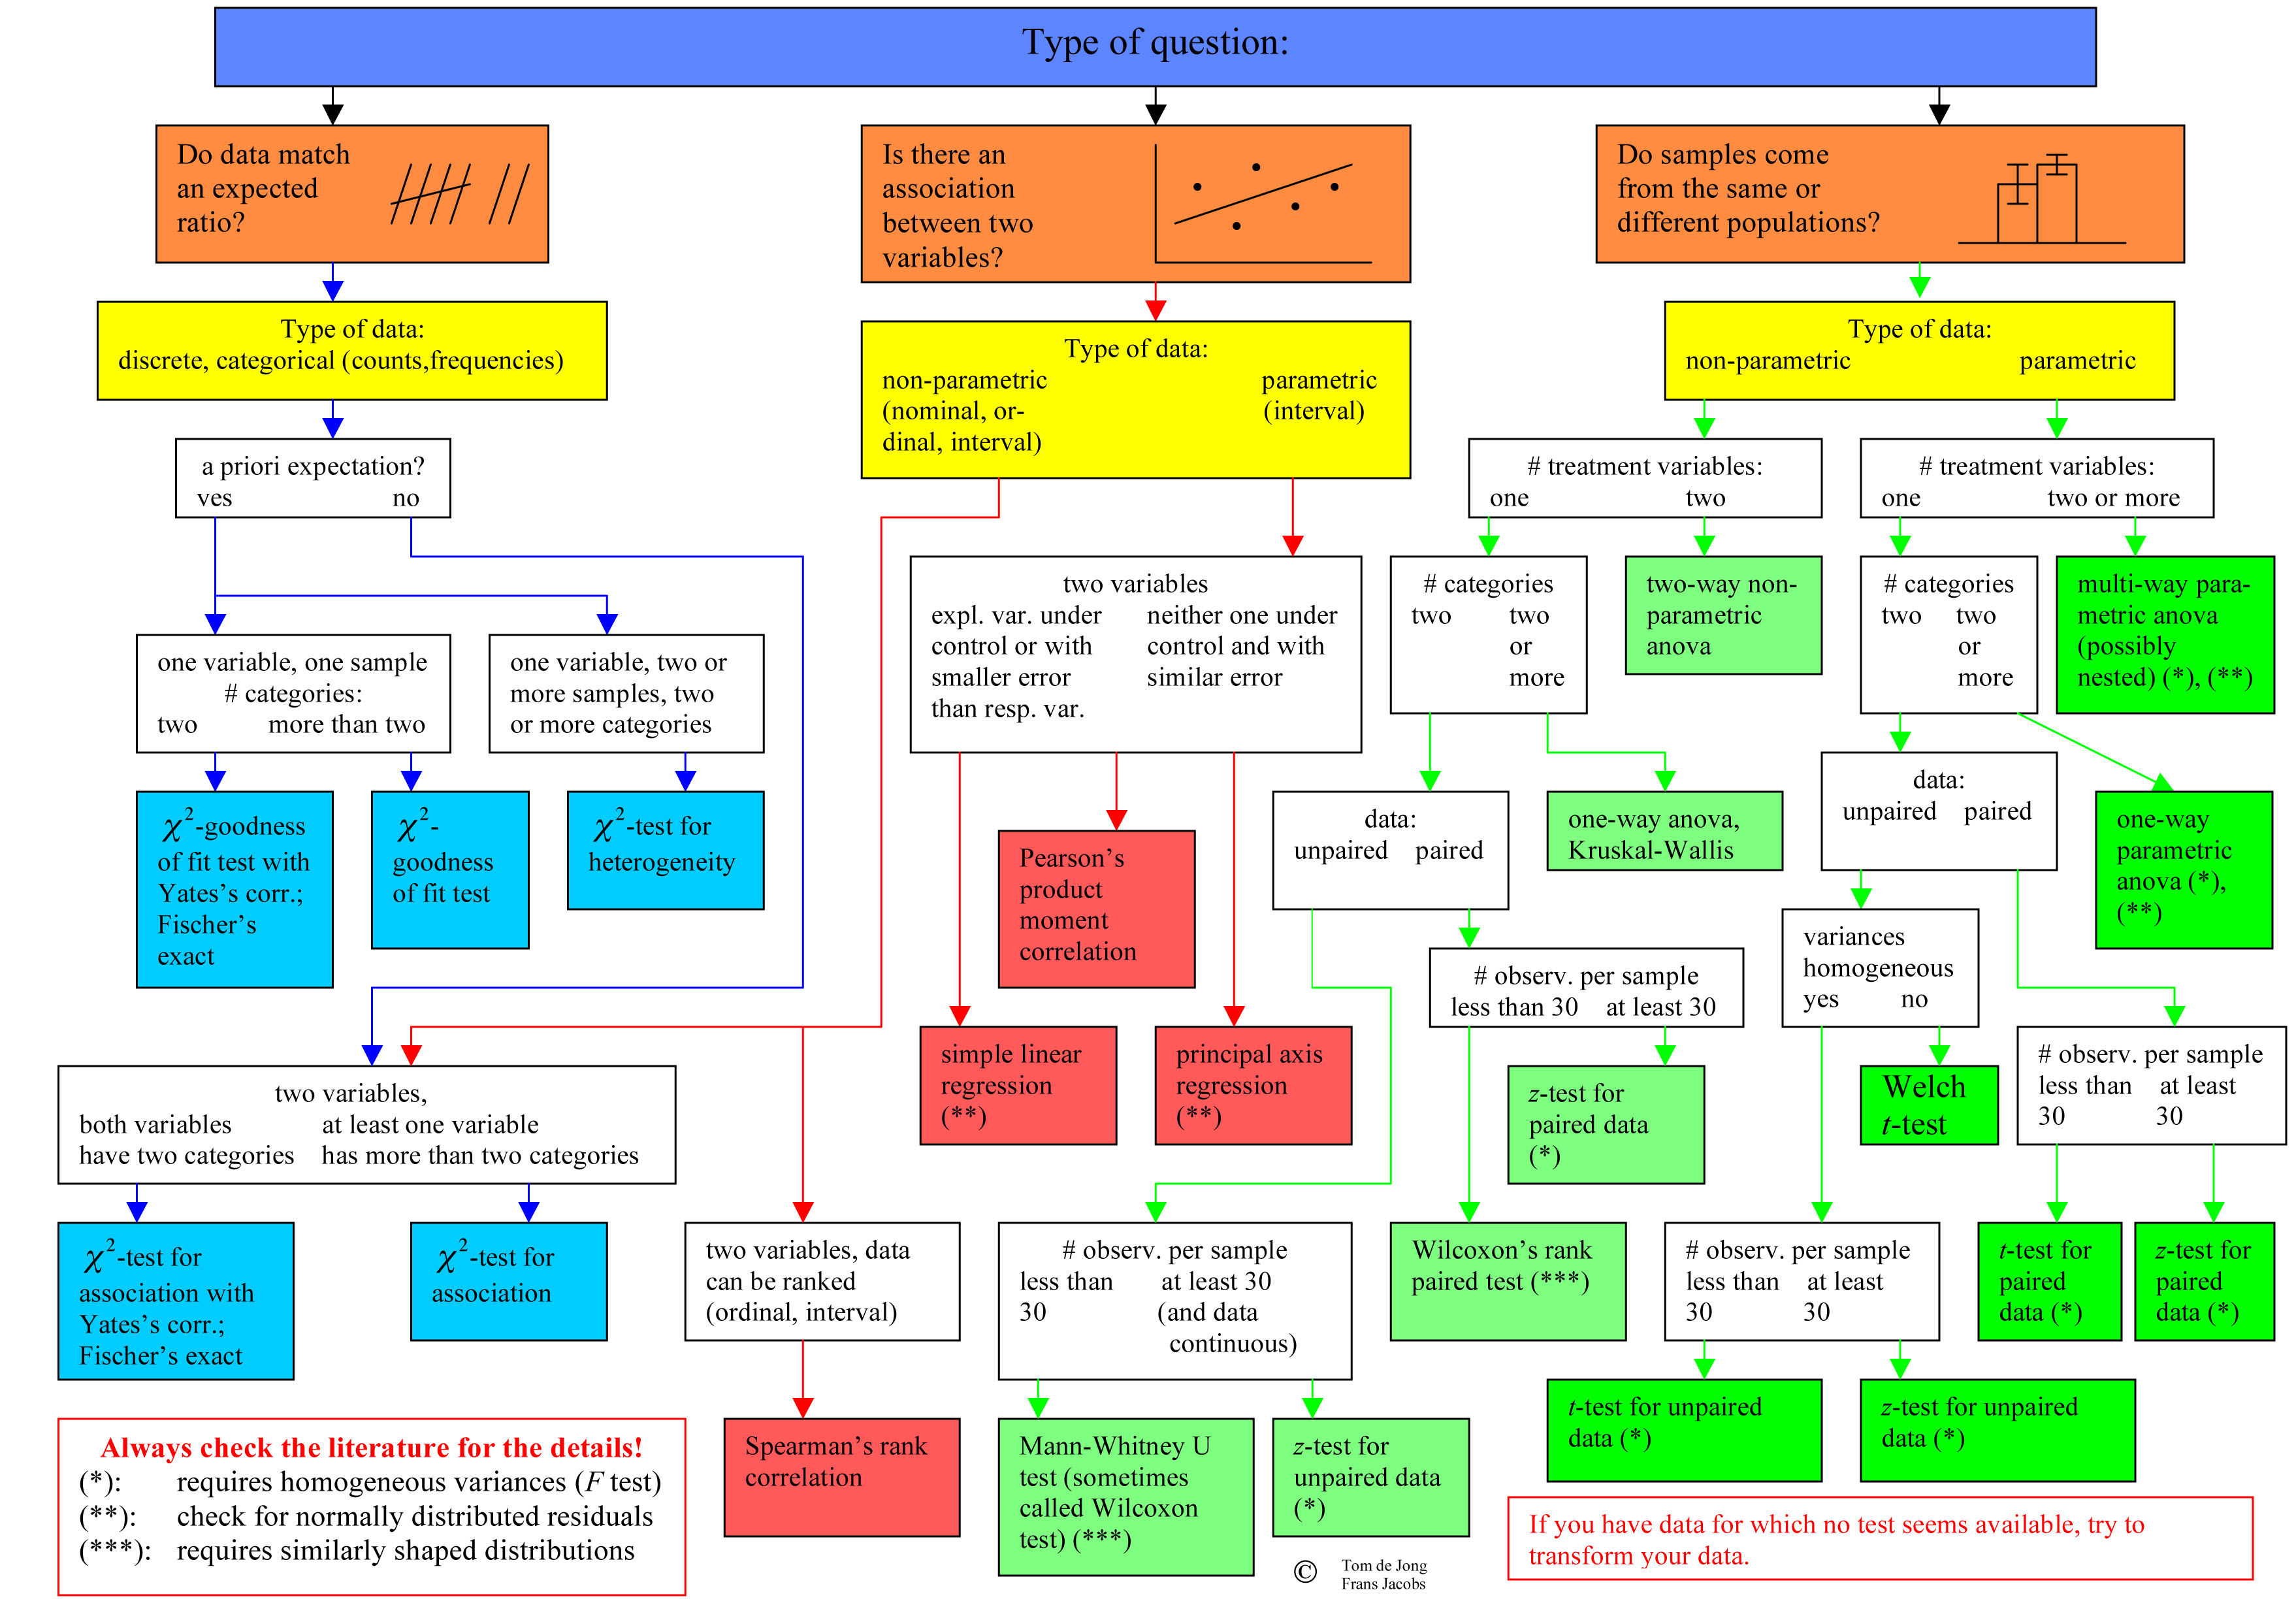

La página https://www.statstest.com/ está buena si quieren ver más test y qué hacen.

El libro **100 Statistical Tests**, como su nombre lo indica, tiene la explicación de 100 test estadísticos con ejemplos.

### Randomización
Para evaluar la variabilidad aleatoria de una muestra, la randomización de los datos es una técnica estadística en la que se extraen repetidamente muestras de los datos observados. Para eso, se mezclan los datos de todos los grupos, bajo la suposición de que los tratamientos no generan diferencias reales.

Un posible procedimiento de permutació npodria ser:

1. Combinar los resultados de todos los grupos en un solo conjunto de datos.
2. Mezclar aleatoriamente los datos y extraer una muestra del mismo tamaño que el grupo A.
3. Extraer otra muestra, del mismo tamaño que el grupo B, a partir de los datos restantes.
4. Calcular la estadística de interés (por ejemplo, la diferencia entre proporciones) para la nueva distribución muestreada.
5. Repetir los pasos anteriores muchas veces (n iteraciones) para generar la distribución de permutaciones.

Finalmente, se compara la diferencia observada entre grupos (sin permutar) con la distribución de diferencias generada por permutación. Si la diferencia observada está fuera de la mayoría de los valores de la distribución de permutación, se concluye que no es producto del azar. En este caso, la diferencia es **estadísticamente significativa**. En cambio, si la diferencia observada se encuentra dentro del rango esperado por azar, no se puede concluir nada significativo.

Para hacer la randomización (o shuffling) vamos a elegir un **estadístico**. Un estadístico es cualquier medida o valor numérico que se calcula a partir de la muestra de los datos. Se usa para describir y resumir la muestra, y a menudo sirve como una estimación de un parámetro desconocido de la población. Esta variable resume información de los datos observados y nos ayuda a hacer inferencias sobre la población.

El estadistico que proponemos utilizar es la diferencia de las medias de la distribucion de boys y girls.

1. Calcular el estadístico original a partir de los datos observados.

2. Realizar un shuffling (reordenamiento aleatorio) de las etiquetas boys y girls. Observación: son iguales la cantidad de muestras de chicos y chicas?

3. Repetir el paso anterior mil veces, calculando el estadístico en cada iteración.

4. Construir un histograma con la distribución de los estadísticos obtenidos mediante el shuffling.

5. Comparar el estadístico observado con la distribución simulada y calcular el p-valor.

Este proceso nos permite evaluar si la diferencia observada entre ambos grupos podría explicarse por azar o si es estadísticamente significativa.

In [ ]:
estadisticos=[]
for i in range (1001):
  permutacion_generos=np.random.permutation(df["Sex"])
  permutacion=df.copy()
  permutacion["Sex"]=permutacion_generos
  estadisticos.append(permutacion[permutacion["Sex"]=="Girls"]["Mean height"].mean()-permutacion[permutacion["Sex"]=="Boys"]["Mean height"].mean())




In [ ]:
estadistico_original=float(chicos.mean()-chicas.mean())
print(estadistico_original)

3.4353406046457167


<ipython-input-56-6f44f07ad3b0>:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  estadistico_original=float(chicos.mean()-chicas.mean())


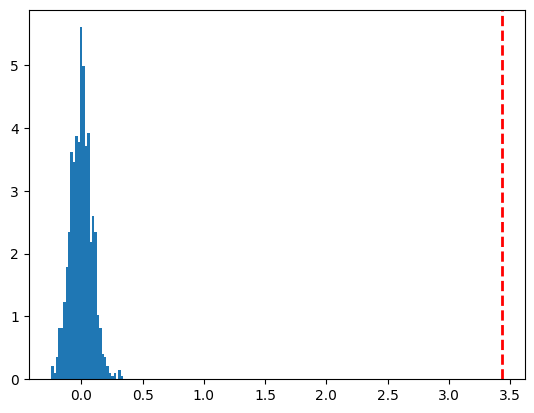

In [ ]:
estadisticos=np.array(estadisticos)
plt.hist(estadisticos, bins=30, density=True)
plt.axvline(x=estadistico_original, color='red', linestyle='dashed', linewidth=2)
plt.show()


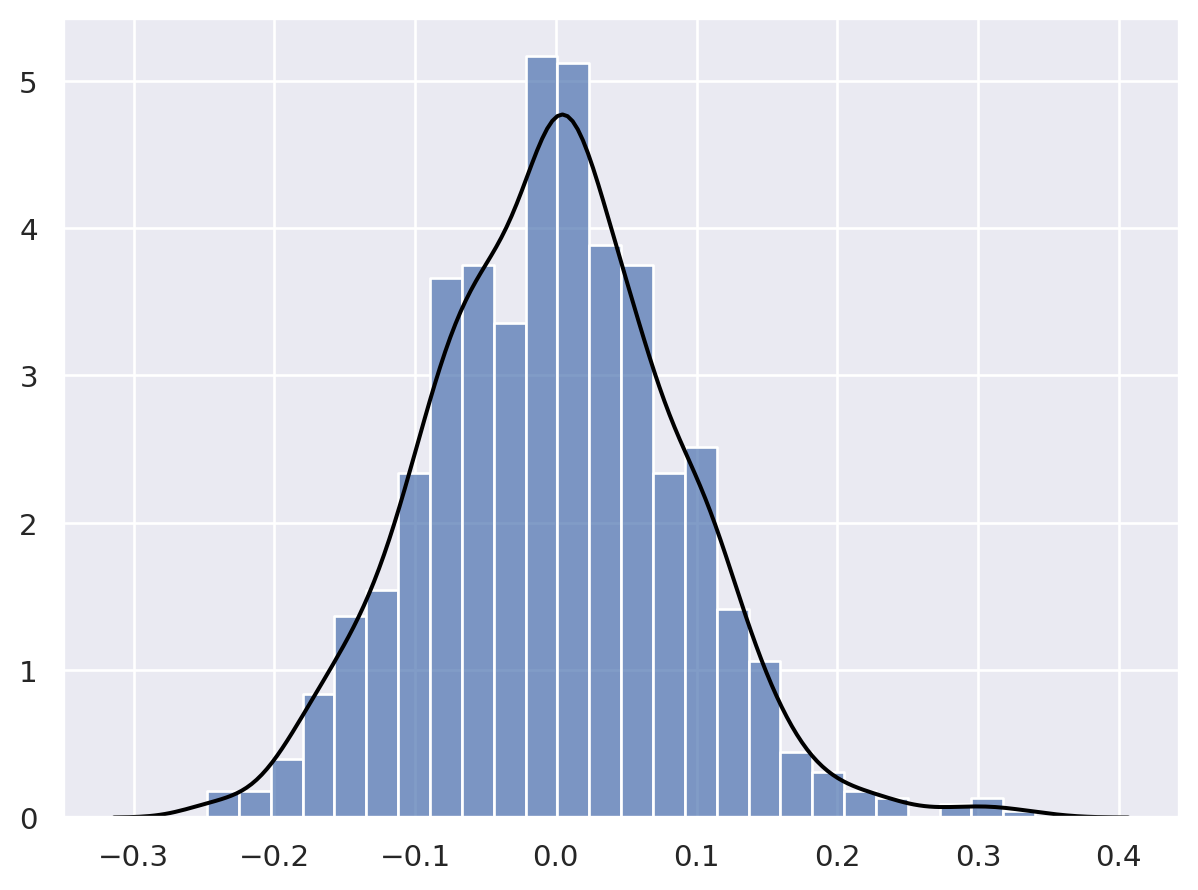

In [ ]:
(
    so.Plot(estadisticos)
    .add(so.Bars(), so.Hist(stat="density"))
    .add(so.Line(edgewidth=4.5, color="black"), so.KDE())
)

In [ ]:
valores_extremos=estadisticos[estadisticos>=estadistico_original]
p_valor=len(valores_extremos)/len(estadisticos) #preguntar
print(f"el p_valor es {p_valor}")
#rechazamos la hip nula
#asumimos distribuciones iguales
#calculamos un estaidtsico que las relaciona
#asumimos que la hip nula es cierto luego "cambiamos" las etiquetas de sexo y encontramos una dist
#el valor q medimos es improbable luego rechazamos la hip nula

el p_valor es 0.0


**Para hacer en casa**:
1. Se te ocurre alguna forma de identificar cuántos paises de sudamerica y de europa tiene el csv? Hay bases de datos que contienen la info de los paises con los continentes. Pueden mapear los paises del dataframes y con los contienentes de la nueva base de datos. También pueden usar:
https://gist.github.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c
 pero fijense que hay que modificar los nombres de los paises. Cómo lo harían?

1. Cómo son las distribuciones de las alturas por continentes? Cuántos datos hay por distribución?
2. Elegí dos continentes.
3. Con qué test compararías las dos distribuciones?

**Para leer en casa**: Hay otras formas de realizar permutaciones mucho más sofisticadas que la simple asignación por azar de una variable.  Uno de estos métodos es el **bootstrap**, que es utilizado para estimar la variabilidad esperada al muestrear repetidamente una distribución desconocida y calcular el estadístico de la muestra en cada ocasión. Este procedimiento consiste en remuestrear repetidamente valores de la muestra original (con reemplazo!) y calcular el estadístico en cada remuestreo, lo que genera una distribución bootstrap del estadístico (o variable que queremos estudiar).

1. Buscar qué hace el método Jackknife.
2. Cuándo conviene usar uno u otro?

Libro: An introduction to the bootstrap (1994)